<a href="https://colab.research.google.com/github/sheepjun96/Hands_On-Maching-Learning/blob/main/3%EC%9E%A5_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# 3.1 MNIST

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist.data, mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
X.shape

(70000, 784)

In [6]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
y.shape

(70000,)

이미지가 70000개 있고 각 이미지에는 784개의 특성이 있다. 이미지가 28x28이기 때문이다. 각각의 특성은 단순히 0 (흰색)부터 255 (검은색)까지의 픽셀 강도를 나타낸다.

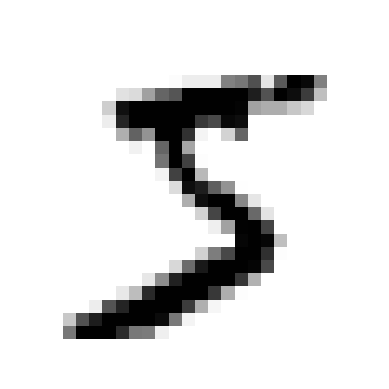

In [8]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [9]:
y[0]

'5'

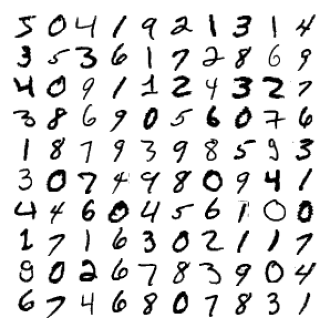

In [10]:
# 추가 코드 – 그림 3–2를 생성하고 저장합니다
plt.figure(figsize=(4, 4))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# 3.2 이진 분류기 훈련

In [12]:
y_train_5 = (y_train == '5')  # 5는 True고, 다른 숫자는 모두 False
y_test_5 = (y_test == '5')

In [13]:
y_train_5

array([ True, False, False, ...,  True, False, False])

확률적 경사 하강법 SGD 분류기로 훈련해보자

In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [15]:
sgd_clf.predict([some_digit])

array([ True])

# 3.3 성능 측정

# 교차 검증을 사용한 정확도 측정

In [16]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

모든 이미지를 가장 많이 등장하는 클래스(여기서는 음성 클래스, 즉 "5 아님")로 분류하는 더미 분류기를 만들어 비교해보자.

In [17]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)

DummyClassifier()

In [18]:
dummy_clf.predict(X_train)

array([False, False, False, ..., False, False, False])

In [19]:
print(any(dummy_clf.predict(X_train)))

False


* any() : 하나라도 True인게 있으면 True
* all() : 모두 True여야 True 반환

In [20]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

이 예제는 정확도를 분류기의 성능 측정 지표로 선호하지 않는 이유를 보여준다. 특히 불균형 데이터셋을 다룰 때 (어떤 클래스가 다른 것보다 월등히 많은 경우) 더욱 그렇다.

분류기의 성능을 평가하는 더 좋은 방법은 오차 행렬을 조사하는 것이다.

# 오차 행렬

오차 행렬의 기본 아이디어는 모든 A/B 쌍에 대해 클래스 A의 샘플이 클래스 B로 분류된 횟수를 세는 것이다. 예를 들어 분류기가 숫자 8의 이미지를 0으로 잘못 분류한 횟수를 알고 싶다면 오차 행렬에서 8번 행 0번 열을 보면 된다.

오차 행렬을 만들려면 실제 타깃과 비교할 수 있도록 예측값을 만들어야 한다. 단, 테스트 세트로 예측을 만들 수 있지만, 테스트 세트는 프로젝트의 맨 마지막에 분류기가 출시 준비를 마치고 사용되므로 다른 방법을 사용한다.

In [21]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [22]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

cross_val_predict 함수는 k-폴드 교차 검증을 수행하지만 평가 점수를 반환하지 않고 각 테스트 폴드에서 얻은 예측을 반환한다.

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

오차 행렬의 행은 실제 클래스를 나타내고, 열은 예측한 클래스를 나타낸다.

이 행렬의 첫 번째 행은 '5 아님' 이미지(음성 클래스)에 대한 것으로, 53892개를 '5 아님'으로 정확하게 분류했고(진짜 음성), 나머지 687개는 '5'라고 잘못 분류했다.(거짓 양성 또는 1종 오류)

두 번째 행은 '5' 이미지(양성 클래스)에 대한 것으로, 1891개를 '5 아님'으로 잘못 분류했고(거짓 음성 또는 2종 오류) 나머지 3530개를 정확히 '5'라고 분류했다(진짜 양성).

완벽한 분류기라면 진짜 양성과 진짜 음성만 가지고 있을 것이므로 오차 행렬의 주대각선만 0이 아닌 값이 된다.

In [24]:
y_train_perfect_predictions = y_train_5     # 완벽한 분류기일 경우
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

**정밀도**: 양성 예측의 정확도
* TP / (TP + FP), TP는 진짜 양성의 수, FP는 거짓 양성의 수

**재현율**: 정확하게 감지한 양성 샘플의 비율
* TP / (TP + FN), FN은 거짓 음성의 수

# 정밀도와 재현율

In [25]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [26]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

**F1 점수**: 2/(1/정밀도 + 1/재현율) = 2 x (정밀도 x 재현율) / (정밀도 + 재현율)

In [27]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

F1 점수가 높은 것도 중요하지만, 정밀도와 재현율의 반비례 관계로 정밀도와 재현율을 상황에 맞게 조절하는 것이 중요하다.

# 정밀도/재현율 트레이드오프